In [1]:
# 主要モジュール
import torch
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt

# 学習用のサンプルデータ
from sklearn import datasets

# データを整理する
from torch.utils.data import DataLoader

# 全結合層と活性化関数
from torch import nn
from torch.nn import functional as F

# 損失関数と最適化関数
from torch import optim
import pandas as pd

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"run with {device}")

run with cuda


In [3]:
df = pd.read_csv('../clean_database/filtered_labeled_train_dataset2.csv', header=None, skiprows=1)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,1,APRN,177,0.690476,0.662562,0.679803,0.659277,0.651067,0.678982,0.751232,...,0.552545,0.554187,0.544335,0.517241,0.532020,0.523809,0.512315,0.521346,0.545977,0.600985
1,1,BACK,280,0.958333,0.944444,0.923611,0.951389,0.944444,0.937500,0.965278,...,0.791667,0.770833,0.795139,0.805556,0.958333,0.972222,0.875000,0.868056,0.902778,0.944444
2,1,BTCS,387,0.859544,0.780312,0.840336,0.819928,0.750300,0.780312,0.812725,...,0.376951,0.374550,0.363745,0.523409,0.518607,0.534214,0.559424,0.675870,0.804322,0.825930
3,1,FUSN,970,0.852976,0.829638,0.861144,0.810969,0.838973,0.835473,0.817970,...,0.486581,0.537923,0.575263,0.564761,0.528588,0.579930,0.576429,0.641774,0.683781,0.732789
4,1,GROW,1049,0.961424,0.922849,0.924333,0.902077,0.879822,0.891692,0.909496,...,0.654638,0.700760,0.682906,0.706711,0.755809,0.752531,0.722727,0.759981,0.865783,0.889625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32391,0,ARDX,191,0.244444,0.244444,0.244444,0.248485,0.250505,0.242424,0.244444,...,0.202020,0.204040,0.191919,0.186869,0.188283,0.178788,0.181818,0.178586,0.170505,0.167475
32392,0,AREC,192,0.692308,0.701183,0.680473,0.680473,0.686390,0.668639,0.718935,...,0.547337,0.588757,0.665680,0.642012,0.647929,0.612426,0.582840,0.556213,0.529586,0.514793
32393,0,ARKO,193,0.909005,0.941232,0.943128,0.946919,0.937441,0.970616,0.988626,...,0.765877,0.800948,0.834123,0.833175,0.823697,0.793365,0.794313,0.771564,0.760190,0.793365
32394,0,ARKR,194,0.721746,0.731670,0.720393,0.724002,0.734377,0.736632,0.740692,...,0.772269,0.783997,0.788057,0.795725,0.781290,0.756932,0.763247,0.757383,0.753774,0.710469


In [5]:
df.iloc[:, 2:]

,2,3,4,5,6,7,8,9,10,11,...,52,53,54,55,56,57,58,59,60,61
0,177,0.690476,0.662562,0.679803,0.659277,0.651067,0.678982,0.751232,0.793103,0.821018,...,0.552545,0.554187,0.544335,0.517241,0.532020,0.523809,0.512315,0.521346,0.545977,0.600985
1,280,0.958333,0.944444,0.923611,0.951389,0.944444,0.937500,0.965278,0.972222,0.965278,...,0.791667,0.770833,0.795139,0.805556,0.958333,0.972222,0.875000,0.868056,0.902778,0.944444
2,387,0.859544,0.780312,0.840336,0.819928,0.750300,0.780312,0.812725,0.813926,0.851140,...,0.376951,0.374550,0.363745,0.523409,0.518607,0.534214,0.559424,0.675870,0.804322,0.825930
3,970,0.852976,0.829638,0.861144,0.810969,0.838973,0.835473,0.817970,0.827305,0.816803,...,0.486581,0.537923,0.575263,0.564761,0.528588,0.579930,0.576429,0.641774,0.683781,0.732789
4,1049,0.961424,0.922849,0.924333,0.902077,0.879822,0.891692,0.909496,0.930267,0.948071,...,0.654638,0.700760,0.682906,0.706711,0.755809,0.752531,0.722727,0.759981,0.865783,0.889625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32391,191,0.244444,0.244444,0.244444,0.248485,0.250505,0.242424,0.244444,0.238384,0.240404,...,0.202020,0.204040,0.191919,0.186869,0.188283,0.178788,0.181818,0.178586,0.170505,0.167475
32392,192,0.692308,0.701183,0.680473,0.680473,0.686390,0.668639,0.718935,0.701183,0.636095,...,0.547337,0.588757,0.665680,0.642012,0.647929,0.612426,0.582840,0.556213,0.529586,0.514793
32393,193,0.909005,0.941232,0.943128,0.946919,0.937441,0.970616,0.988626,0.985782,0.964929,...,0.765877,0.800948,0.834123,0.833175,0.823697,0.793365,0.794313,0.771564,0.760190,0.793365
32394,194,0.721746,0.731670,0.720393,0.724002,0.734377,0.736632,0.740692,0.744752,0.743399,...,0.772269,0.783997,0.788057,0.795725,0.781290,0.756932,0.763247,0.757383,0.753774,0.710469


In [6]:
df = pd.read_csv('../clean_database/filtered_labeled_train_dataset.csv', header=None, skiprows=1)

# 1.DataFrameを説明変数と目的変数に分ける
x = df.iloc[:, 2:]
t = pd.get_dummies(df[0])

# 2.DataFrameをnarrayに変換
x = x.to_numpy().astype("float32")
t = t.to_numpy().astype("float32")

# 3.ndarrayをTensorに変換
x = torch.from_numpy(x).to(device)
t = torch.from_numpy(t).to(device)

# 4.TensorからDatasetを作成
dataset = torch.utils.data.TensorDataset(x, t)

# 6.DataLoaderに変換
batch_size = 20
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [7]:
df = pd.read_csv('../clean_database/labeled_valid_dataset.csv', header=None, skiprows=1)

# 1.DataFrameを説明変数と目的変数に分ける
x = df.iloc[:, 2:]
t = pd.get_dummies(df[0])

# 2.DataFrameをnarrayに変換
x = x.to_numpy().astype("float32")
t = t.to_numpy().astype("float32")

# 3.ndarrayをTensorに変換
x = torch.from_numpy(x).to(device)
t = torch.from_numpy(t).to(device)

# 4.TensorからDatasetを作成
dataset = torch.utils.data.TensorDataset(x, t)

# 6.DataLoaderに変換
batch_size = 20
test_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [8]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # Fully connected layer
        self.fc = nn.Linear(hidden_size, num_classes)

        # 損失関数と最適化関数
        self.criterion = nn.CrossEntropyLoss()
        self.criterion_2 = nn.HingeEmbeddingLoss()
        self.optimizer = optim.Adam(self.parameters())

    def forward(self, x, hidden0=None):        
        # Forward pass
        out, (hidden, cell) = self.lstm(x, hidden0)
        # Index hidden state of last time step
        out = self.fc(out)
        return out

In [9]:
def train(model, data_loader):
    # 今は学習時であることを明示するコード
    model.train()

    # 正しい予測数、全体のデータ数を数えるカウンターの0初期化
    total_correct = 0
    total_data_len = 0

    loss_mean = 0


    # ミニバッチごとにループさせる,train_loaderの中身を出し切ったら1エポックとなる
    for j, (x, t) in enumerate(data_loader):
        y = model(x)  # 順伝播

        model.optimizer.zero_grad()  # 勾配を初期化（前回のループ時の勾配を削除）
        loss = model.criterion(y, t)  # 損失関数を計算
        loss.backward()  # 逆伝播で勾配を計算
        model.optimizer.step()  # 最適化

        loss_mean += loss.item()

        # ミニバッチごとの正答率と損失を求める
        _, index_y = torch.max(y, axis=1)  # 最も確率が高いと予測したindex
        _, index_t = torch.max(t, axis=1)  # 正解のindex
        for i in range(len(t)):  # データ一つずつループ,ミニバッチの中身出しきるまで
            total_data_len += 1  # 全データ数を集計
            if index_y[i] == index_t[i]:
                total_correct += 1 # 正解のデータ数を集計

    loss_mean = loss_mean / (j+1)

    return total_correct, total_data_len, loss_mean

In [10]:
def test(model, data_loader):
    # モデルを評価モードにする
    model.eval()

    # 正しい予測数、全体のデータ数を数えるカウンターの0初期化
    total_data_len = 0
    total_correct = 0

    loss_mean = 0

    for j, (x, t) in enumerate(data_loader):
        y = model(x)  # 順伝播（=予測）
        loss = model.criterion(y, t)  # 損失を計算
        loss_mean += loss.item()

        # ミニバッチごとの正答率と損失を求める
        _, index_y = torch.max(y, axis=1)  # 最も確率が高いと予測したindex
        _, index_t = torch.max(t, axis=1)  # 正解のindex
        for i in range(len(t)):  # データ一つずつループ,ミニバッチの中身出しきるまで
            total_data_len += 1  # 全データ数を集計
            if index_y[i] == index_t[i]:
                total_correct += 1 # 正解のデータ数を集計

    loss_mean = loss_mean / (j+1)

    return total_correct, total_data_len, loss_mean

In [11]:
# アーキテクチャのインスタンス作成
# model = Net().to(device)

input_size = 60
# hidden_size = 2
# num_layers = 3
hidden_size = 4
num_layers = 4
num_classes = 2

# Create the model
model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)

epochs = 80
record_train_loss = []
record_test_loss = []
for epoch in range(epochs):
    train_correct_len, train_data_len, train_loss = train(model, train_loader)
    test_correct_len, test_data_len, test_loss = test(model, test_loader)

    train_acc = train_correct_len/train_data_len*100
    test_acc = test_correct_len/test_data_len*100

    record_train_loss.append(train_loss)
    record_test_loss.append(test_loss)
    # 重みとバイアスのみ保存
    torch.save(model.state_dict(), f'./weights/model_weight_train_loss_{train_loss:.5f}_test_loss_{test_loss:.5f}_epoch_{epoch}.pth')

    print(f"epoch={epoch}, train:{train_correct_len}/{train_data_len}({train_acc:.2f}%), {train_loss:.5f}, test:{test_correct_len}/{test_data_len}({test_acc:.2f}%), {test_loss:.5f}")


epoch=0, train:15063/30186(49.90%), 0.69336, test:13329/13405(99.43%), 0.66834
epoch=1, train:15114/30186(50.07%), 0.69330, test:13325/13405(99.40%), 0.68499
epoch=2, train:14952/30186(49.53%), 0.69334, test:13329/13405(99.43%), 0.68845
epoch=3, train:15223/30186(50.43%), 0.69321, test:12666/13405(94.49%), 0.68821
epoch=4, train:15114/30186(50.07%), 0.69324, test:11988/13405(89.43%), 0.69078
epoch=5, train:15046/30186(49.84%), 0.69332, test:13329/13405(99.43%), 0.68214
epoch=6, train:15007/30186(49.72%), 0.69332, test:76/13405(0.57%), 0.70229
epoch=7, train:15036/30186(49.81%), 0.69327, test:13329/13405(99.43%), 0.68340
epoch=8, train:14992/30186(49.67%), 0.69327, test:76/13405(0.57%), 0.71315
epoch=9, train:14991/30186(49.66%), 0.69328, test:13329/13405(99.43%), 0.67658
epoch=10, train:15204/30186(50.37%), 0.69303, test:6782/13405(50.59%), 0.68624
epoch=11, train:17381/30186(57.58%), 0.67668, test:6413/13405(47.84%), 0.82082
epoch=12, train:19510/30186(64.63%), 0.63289, test:4580/1340

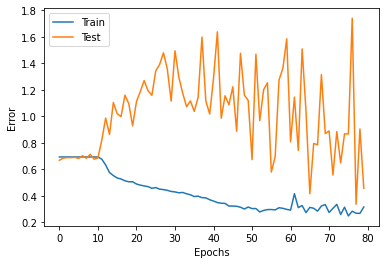

In [13]:
plt.plot(range(len(record_train_loss)), record_train_loss, label="Train")
plt.plot(range(len(record_test_loss)), record_test_loss, label="Test")
plt.legend()

# plt.xlim(0,100)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

[0.6943001136631117,
 0.6933093541075946,
 0.693301909239683,
 0.663904946099528,
 0.5069686463124207,
 0.4684002678540232,
 0.4353858014314885,
 0.39914339665521376,
 0.3605155191162717,
 0.32142360911083,
 0.28355591298741295,
 0.24788539762464598,
 0.21214084008033227,
 0.18855745206731125,
 0.17967212647543768,
 0.153263728444058,
 0.13714217324741185,
 0.12395301303615489,
 0.11985661709244529,
 0.11001625184161162,
 0.11446037368663946,
 0.09694679795444984,
 0.08882202314375308,
 0.09583590434343656,
 0.09663792852931774,
 0.08693780967461345,
 0.07327628139472044,
 0.0774329305001627,
 0.07382300295936929,
 0.07733076915986982,
 0.064204234887435,
 0.07380733728672563,
 0.07519813455607931,
 0.06453922995531235,
 0.07020703555958821,
 0.06145526849879565,
 0.06518458196203446,
 0.06175539743434315,
 0.05932088548622167,
 0.072132386413847,
 0.06121455829826616,
 0.05644595064323634,
 0.06787002372744173,
 0.05240132776478856,
 0.05616077859122435,
 0.05779918155126923,
 0.05758

In [23]:
import csv

# 2つのリストを定義する
list1 = record_train_loss
list2 = record_test_loss

# CSVファイルに書き込む
with open('output_2023_10_18.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['list1', 'list2'])
    for i in range(len(list1)):
        writer.writerow([list1[i], list2[i]])

In [ ]:
# 2.DataFrameをnarrayに変換
x = x.to_numpy().astype("float32")
t = t.to_numpy().astype("float32")

# 3.ndarrayをTensorに変換
x = torch.from_numpy(x).to(device)
t = torch.from_numpy(t).to(device)

# tの種類によってtrain_datasetとtest_datasetを作成する
t_unique = torch.unique(t)
train_dataset_list = []
test_dataset_list = []

r = 0.9

for t_val in t_unique:
    # t_valに対応するxのインデックスを取得
    idx = torch.where(t[:, 1] == t_val)
    # xとtを取得
    x_t = x[idx]
    t_t = t[idx]
    # TensorDatasetを作成
    dataset_t = torch.utils.data.TensorDataset(x_t, t_t)
    # データセットを分割
    train_dataset_t, test_dataset_t = torch.utils.data.random_split(dataset_t, [r, 1-r])
    # リストに追加
    train_dataset_list.append(train_dataset_t)
    test_dataset_list.append(test_dataset_t)

# train_datasetとtest_datasetを作成
train_dataset = torch.utils.data.ConcatDataset(train_dataset_list)
test_dataset = torch.utils.data.ConcatDataset(test_dataset_list)

# 6.DataLoaderに変換
batch_size = 20
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)